In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Read Dataset

In [72]:
import os
from pathlib import Path

file_path = Path('/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/')
file_content = list(file_path.glob(r'**/*.png'))

#create labels as per the label name

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_content))


In [73]:
file_content = pd.Series(file_content).astype(str)
labels = pd.Series(labels)

In [74]:
df = pd.concat([file_content, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel


In [75]:
#shape of the dataset

df.shape

(18000, 2)

# # # Visualizing the data

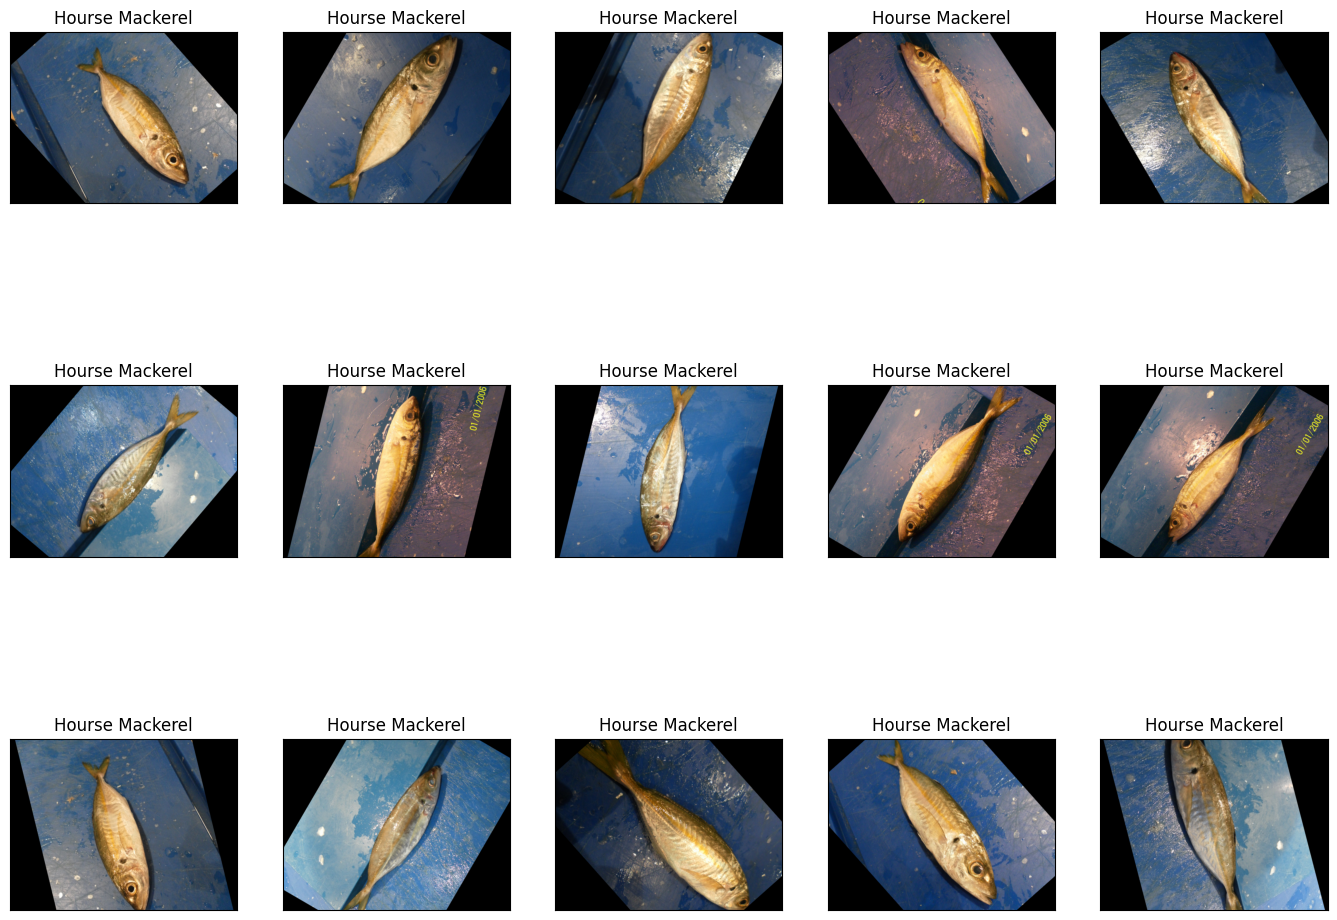

In [76]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(17,13), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

**Seaborn ile Dağılım Grafiği**

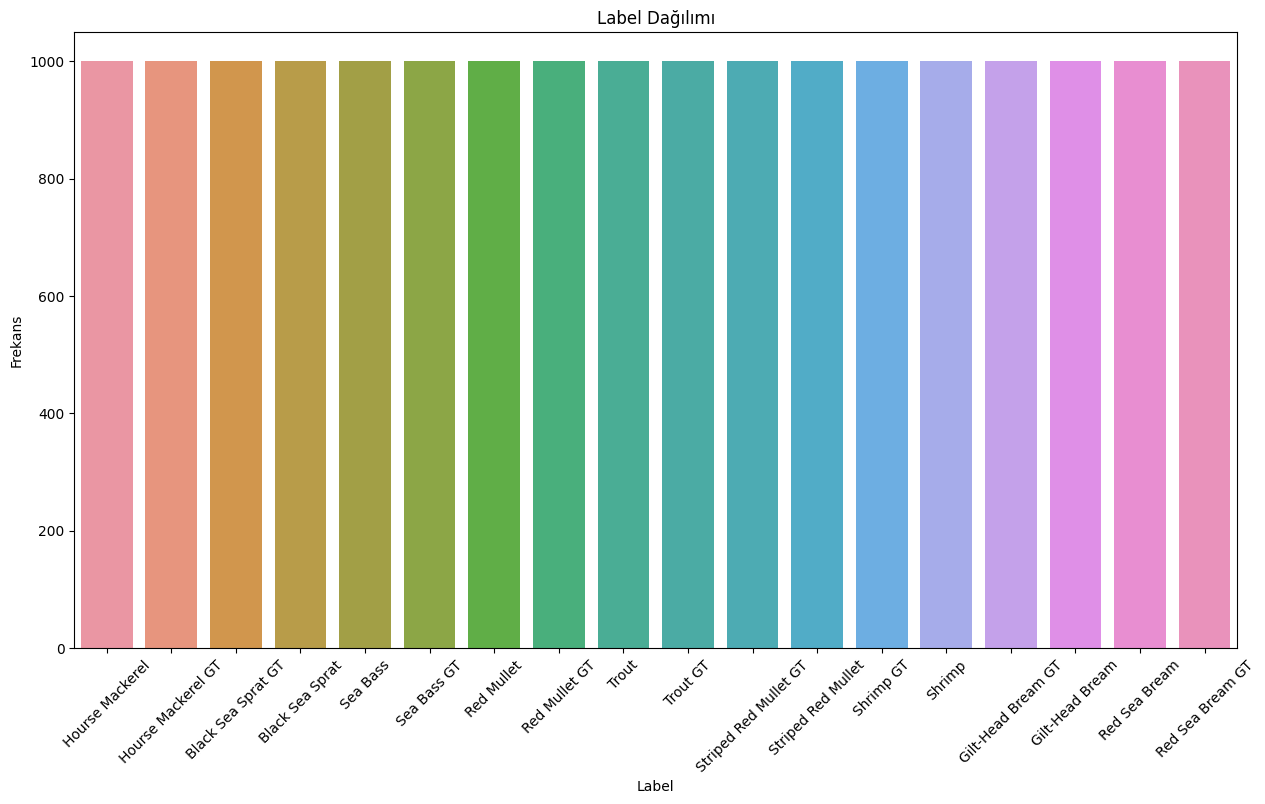

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 8))
sns.countplot(x='label', data=df)  # Burada x ekseninde 'Label' kullanılıyor
plt.title('Label Dağılımı')
plt.xlabel('Label')
plt.ylabel('Frekans')
plt.xticks(rotation=45)  # X eksenindeki label'ları döndür
plt.show()


# Split the data

In [78]:
# split the data into training and validation set


from sklearn.model_selection import train_test_split 

x_train, x_test = train_test_split(df, test_size=0.3, random_state=42)
x_train, x_val = train_test_split(x_train, test_size =0.3, random_state=42)

In [79]:
print("The shape of training data", x_train.shape)
print("The shape of validation data", x_val.shape)
print("The shape of test data", x_test.shape)

The shape of training data (8820, 2)
The shape of validation data (3780, 2)
The shape of test data (5400, 2)


# # # Model creation

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma işlemleri için ImageDataGenerator nesneleri oluşturun
train_datagen = ImageDataGenerator(rescale=1./255)  # Eğitim verisi için normalizasyon
validation_datagen = ImageDataGenerator(rescale=1./255)  # Doğrulama verisi için normalizasyon
test_datagen = ImageDataGenerator(rescale=1./255)  # Test verisi için normalizasyon

# Eğitim verisi için generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=x_train,
    x_col='image',  # Resim yolunun bulunduğu sütun
    y_col='label',  # Etiketlerin bulunduğu sütun
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=128
)

# Doğrulama verisi için generator
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=x_val,
    x_col='image',  # Resim yolunun bulunduğu sütun
    y_col='label',  # Etiketlerin bulunduğu sütun
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=64
)

# Test verisi için generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=x_test,
    x_col='image',  # Resim yolunun bulunduğu sütun
    y_col='label',  # Etiketlerin bulunduğu sütun
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=64
)



Found 8820 validated image filenames belonging to 18 classes.
Found 3780 validated image filenames belonging to 18 classes.
Found 5400 validated image filenames belonging to 18 classes.


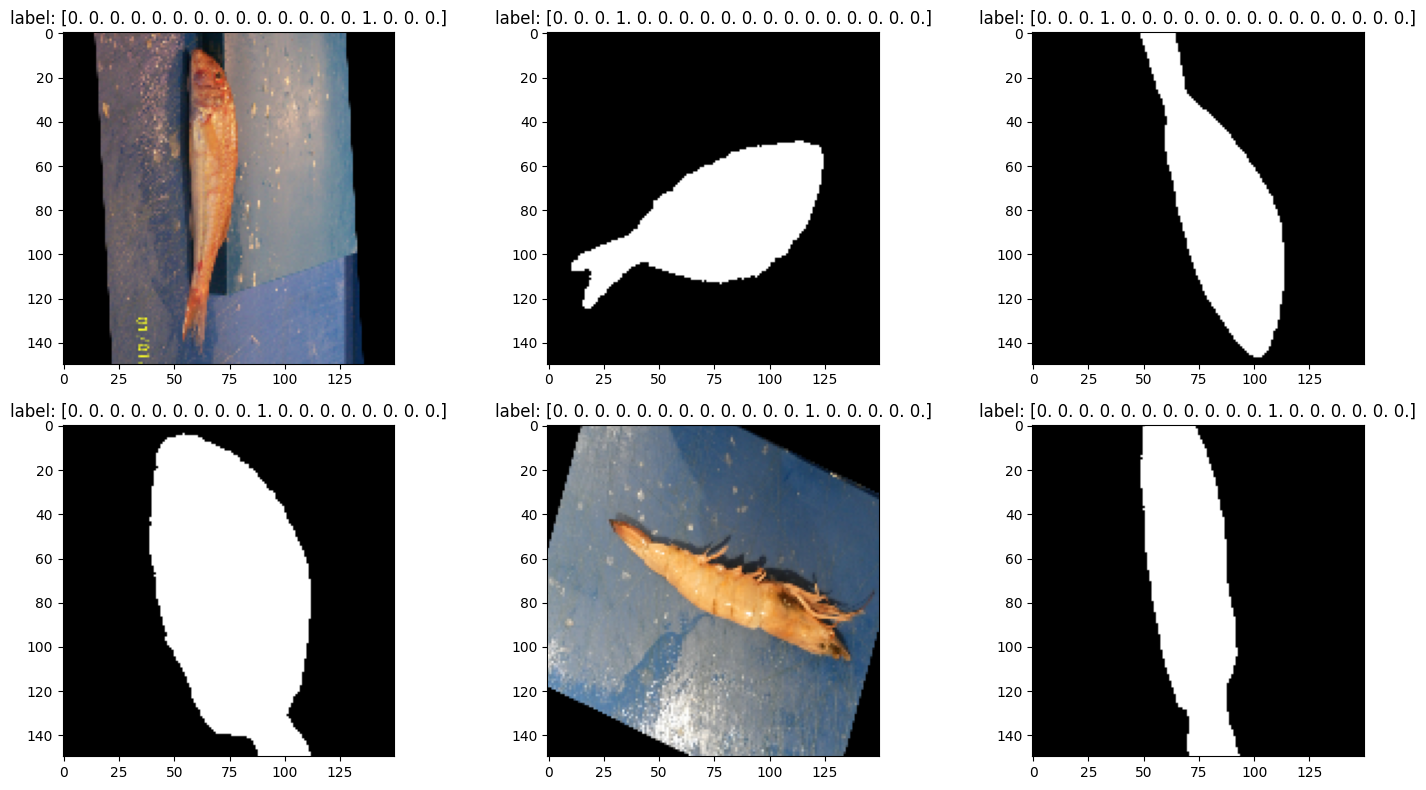

In [83]:
import matplotlib.pyplot as plt

# Resimleri ve etiketleri çizmek için 2x3'lik bir grafik oluştur
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
ax = ax.flatten()

# 6 resim görüntüle
for j, (img, label) in zip(range(6), test_generator):  # for döngüsünde direkt olarak kullanabilirsiniz
    ax[j].imshow(img[0])  # İlk resmi göster
    ax[j].set_title(f"label: {label[0]}")  # Etiketi ayarlayın

plt.tight_layout()  # Grafik düzenini iyileştirin
plt.show()  # Grafiği göster

In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',
                          input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
    
])

In [86]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,476,553 (13.26 MB)

 Trainable params: 3,476,553 (13.26 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
# Modelinizi oluşturduktan sonra derleyin
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.add(Dense(18, activation='softmax'))

history = model.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,  # Doğrulama verisi
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # Doğrulama adım sayısı
    verbose=1  # Eğitim ilerlemesini göster
)



Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 400s 6s/step - accuracy: 0.0955 - loss: 2.8078 - val_accuracy: 0.1099 - val_loss: 2.7374
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 977us/step - accuracy: 0.1641 - loss: 2.7379 - val_accuracy: 0.0000e+00 - val_loss: 2.7223
Epoch 3/30


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


68/68 ━━━━━━━━━━━━━━━━━━━━ 373s 5s/step - accuracy: 0.1308 - loss: 2.7110 - val_accuracy: 0.1446 - val_loss: 2.6734
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 753us/step - accuracy: 0.1016 - loss: 2.6759 - val_accuracy: 0.0000e+00 - val_loss: 2.8286
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 394s 6s/step - accuracy: 0.1509 - loss: 2.6514 - val_accuracy: 0.1483 - val_loss: 2.6057
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 760us/step - accuracy: 0.1875 - loss: 2.6067 - val_accuracy: 0.2500 - val_loss: 2.5580
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 396s 6s/step - accuracy: 0.1645 - loss: 2.5894 - val_accuracy: 0.1441 - val_loss: 2.5580
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 787us/step - accuracy: 0.1406 - loss: 2.5882 - val_accuracy: 0.2500 - val_loss: 2.4786
Epoch 9/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 373s 5s/step - accuracy: 0.1508 - loss: 2.5471 - val_accuracy: 0.1512 - val_loss: 2.5145
Epoch 10/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 962us/step - accuracy: 0.1484 - loss: 2.5029 - val_accuracy: 0.0000e+00 -

In [92]:
import pandas as pd
